In [29]:
import Lagrange_poly3 as lp3
import Lagrange_poly4 as lp4
import Polynomial as pn
import Polynomial_vec as pv
import Polynomial_dict as pd
import numpy as np

# Homework 7

### Taylor Patti
### 4/23/16

### Lagrange_poly3

The utility of interpolating functions was contained in a class which creates an instance with a given set of interpolating points. The functions of the class can both call for an interpolating point value and graph the actual points of the function with the interpolated function plotted over it.

In [30]:
xp = np.linspace(0, np.pi, 5)
yp = np.sin(xp)
middle = xp[2] - xp[1] / 2
LagPol = lp3.LagrangePoly(xp, yp)
print 'Function interpolates: ',
print LagPol.p_L(middle)
print 'Actual sine result is: ',
print np.sin(middle)

Function interpolates:  0.924095869121
Actual sine result is:  0.923879532511


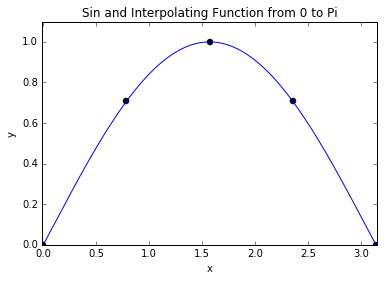

In [31]:
LagPol.graph(np.sin, 5, 0, np.pi)

### Lagrange_poly4

This class is much like the other class above, with the sole acception that a python function, the min and max points, and the value of the number of points to be taken is passed in as an argument instead. It is thus within the initilization of the instance that the xp and yp vectors are generated for the instance at hand, and the remainder of the functions work in an analogous manner.

In [32]:
LagPol = lp4.LagrangePolyFunctions(np.sin)
middle = LagPol.xp[2] - LagPol.xp[1] / 2
print 'Function interpolates: ',
print LagPol.p_L(middle)
print 'Actual sine result is: ',
print np.sin(middle)

Function interpolates:  0.453990499411
Actual sine result is:  0.45399049974


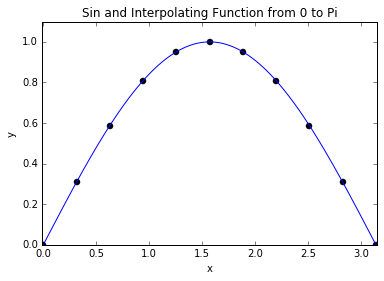

In [33]:
LagPol.graph()

### Polynomial_vec

This implementation vectorizes the polynomials class in order to provide for increased efficiency. The idea would be that vectorized functions would have increased speed over their iterative counterparts, at least for data structures of significant size. In what follows, the vectorized functions of the new module are compared for efficiency against the unvectorized iterative version, and the surprising result that the unverctorized version is actually more efficient in these cases results. It is possible that for very large polynomials this problem would be resolved, but as of yet the cause of this is unsure, although surely due to something the programer failed to do properly.

In [34]:
coefficients = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
%timeit normal = pn.Polynomial(coefficients)

The slowest run took 9.48 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 427 ns per loop


In [35]:
%timeit vectorized = pv.Polynomial(coefficients)

The slowest run took 6.16 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.1 µs per loop


In [36]:
normal = pn.Polynomial(coefficients)
%timeit normal.__add__(normal)

100000 loops, best of 3: 2.67 µs per loop


In [37]:
vectorized = pv.Polynomial(coefficients)
%timeit vectorized.__add__(vectorized)

The slowest run took 7.22 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 9.4 µs per loop


In [38]:
%timeit normal.__mul__(normal)

10000 loops, best of 3: 55.1 µs per loop


In [39]:
%timeit vectorized.__mul__(vectorized)

10000 loops, best of 3: 54.5 µs per loop


In [40]:
%timeit normal.__call__(5)

100000 loops, best of 3: 2.38 µs per loop


In [41]:
%timeit vectorized.__call__(5)

The slowest run took 12.50 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.76 µs per loop


### Polynomial_dict

A dictionary version of the polynomial function is also implemented. This means that the coefficients of the polynomial are stored in a python dictionary, which uses keys, the degree of the coefficient power, in order to call up values, which are the coefficients of the powers themselves. These implementations are always slower than their iterative counterparts and sometimes slower, sometimes faster than the vectorized implementation. Assuming that ideally vectorized code would be the fastest implementation, a disadvantage of the dictionary class would be its efficiency. Benefits of the dictionary would be easily readable and adjustable code, as the addition of new keys or alteration of values in a dictionary is a very simple and straight forward proceedure. Moreover, dictionaries are user friendly in many other respects, such as their simple double equal sign test for equality.

In [42]:
%timeit pd.Polynomial({0:5, 1:5, 2:5, 3:5, 4:5, 5:5, 6:5, 7:5, 8:5, 9:5, 10:5})

The slowest run took 8.62 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.16 µs per loop


In [43]:
dictionary = pd.Polynomial({0:5, 1:5, 2:5, 3:5, 4:5, 5:5, 6:5, 7:5, 8:5, 9:5, 10:5})
%timeit dictionary.__add__(dictionary)

10000 loops, best of 3: 24.1 µs per loop


In [44]:
%timeit dictionary.__mul__(dictionary)

10000 loops, best of 3: 39 µs per loop
